# Dataset: Saúde Mental em Tech
## https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

![title](img.png)

## Perguntas:

1. Quais grupos de idade estão mais conscientes sobre sua saúde mental?
2. Qual a associação entre gênero e tratamento?
3. Como o histórico familiar é relacionado com a presença de doenças mentais e tratamento?
4. Qual é o nível de interferência no trabalho que essas doenças causam?
5. Os funcionários conhecem as opções para tratamento mental que os seus empregadores fornecem?
6. Os funcionários acreditam que discutir a saúde mental ou a saúde física com seus empregadores pode trazer consequências negativas?
7. Quantos funcionátios estão dispostos a dicutir saúde mental com seus colegas ou supervisores?
8. Os funcionários trariam problemas de saúde mental ou física em uma entrevista de emprego?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.shape

(1259, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

In [6]:
df.drop(['state'], axis=1, inplace=True)

In [8]:
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)
df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)

/var/folders/ts/25xsg3cx09zgv15ygxc6krc00000gn/T/ipykernel_86411/1886957482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)


In [9]:
df.isnull().sum().sort_values(ascending=False)

comments                     1095
Age                             0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
seek_help                       0
Timestamp                       0
care_options                    0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
work_interfere                  0
treatment                       0
family_history                  0
self_employed                   0
Country                         0
Gender                          0
wellness_program                0
dtype: int64

In [10]:
colunas_irrelevantes = ['obs_consequence', 'mental_vs_physical', 'leave', 'anonymity', 'seek_help', 'Timestamp', 'benefits', 'tech_company', 'no_employees', 'self_employed', 'wellness_program', 'comments']

In [11]:
df.drop(colunas_irrelevantes, axis=1, inplace=True)

In [12]:
df.head()

,Age,Gender,Country,family_history,treatment,work_interfere,remote_work,care_options,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview
0,37,Female,United States,No,Yes,Often,No,Not sure,No,No,Some of them,Yes,No,Maybe
1,44,M,United States,No,No,Rarely,No,No,Maybe,No,No,No,No,No
2,32,Male,Canada,No,No,Rarely,No,No,No,No,Yes,Yes,Yes,Yes
3,31,Male,United Kingdom,Yes,Yes,Often,No,Yes,Yes,Yes,Some of them,No,Maybe,Maybe
4,31,Male,United States,No,No,Never,Yes,No,No,No,Some of them,Yes,Yes,Yes


In [14]:
df[df.duplicated()].shape

(5, 14)

In [16]:
df.drop_duplicates(inplace=True)

In [20]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df.describe(include='all')

,Age,Gender,Country,family_history,treatment,work_interfere,remote_work,care_options,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview
count,1254.00,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254
unique,NaN,49,48,2,2,4,2,3,3,3,3,3,3,3
top,NaN,Male,United States,No,Yes,Sometimes,No,No,No,No,Some of them,Yes,No,Maybe
freq,NaN,614,750,764,635,727,878,500,489,922,771,516,1004,555
mean,79744847.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2823912472.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1726.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df = df[df['Age']>=18]

In [30]:
df = df[df['Age']<110]

In [32]:
df.describe(include='all')

,Age,Gender,Country,family_history,treatment,work_interfere,remote_work,care_options,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview
count,1246.00,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246
unique,NaN,46,46,2,2,4,2,3,3,3,3,3,3,3
top,NaN,Male,United States,No,Yes,Sometimes,No,No,No,No,Some of them,Yes,No,Maybe
freq,NaN,611,745,759,630,724,875,498,486,917,768,512,999,553
mean,32.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df['Gender'].str.lower().unique()

m = ['m', 'male', 'maile', 'cis male', 'mal', 'male (cis)', 'make', 'male ', 'man', 'msle', 'mail', 'malr', 'cis man']
f = ['female', 'trans-female', 'cis female', 'f', 'woman', 'femake', 'female ', 'cis-female/femme','trans woman', 'female (trans)', 'female (cis)', 'femail']

for (row, col) in df.iterrows():
    if str.lower(col['Gender']) in m:
        df['Gender'].replace(to_replace=col['Gender'], value='m', inplace=True)
    elif str.lower(col['Gender']) in f:
        df['Gender'].replace(to_replace=col['Gender'], value='f', inplace=True)
    else:
        df['Gender'].replace(to_replace=col['Gender'], value='other', inplace=True)


In [38]:
df['Gender'].unique()

array(['f', 'm', 'other'], dtype=object)

In [39]:
df.describe(include='all')

,Age,Gender,Country,family_history,treatment,work_interfere,remote_work,care_options,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview
count,1246.00,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246
unique,NaN,3,46,2,2,4,2,3,3,3,3,3,3,3
top,NaN,m,United States,No,Yes,Sometimes,No,No,No,No,Some of them,Yes,No,Maybe
freq,NaN,980,745,759,630,724,875,498,486,917,768,512,999,553
mean,32.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Quais grupos de idade estão mais conscientes sobre sua saúde mental?

<Axes: xlabel='Age', ylabel='Count'>

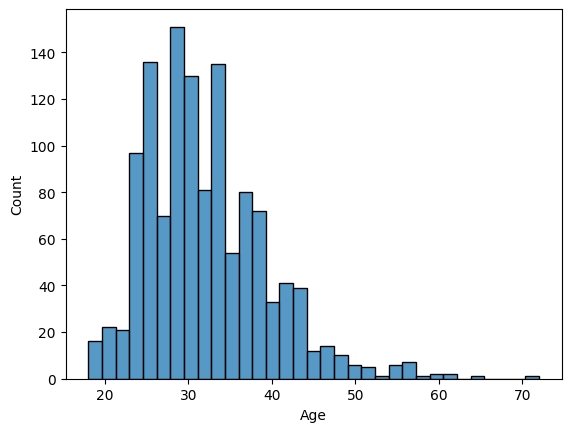

In [43]:
sns.histplot(data=df, x='Age')

/var/folders/ts/25xsg3cx09zgv15ygxc6krc00000gn/T/ipykernel_86411/3408520034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt['treatment_bool'] = filt['treatment'].map({'Yes':True, 'No':False})


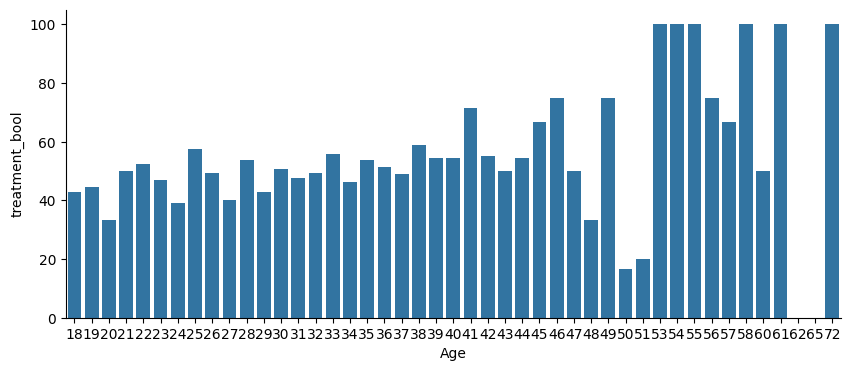

In [64]:
filt = df[['Age', 'treatment']]
filt['treatment_bool'] = filt['treatment'].map({'Yes':True, 'No':False})

perc = filt.groupby('Age')['treatment_bool'].mean() * 100

perc = perc.reset_index()

plt.figure(figsize=(10,4))

sns.barplot(x=perc['Age'], y=perc['treatment_bool'])

sns.despine()

### 2. Qual a associação entre gênero e tratamento?

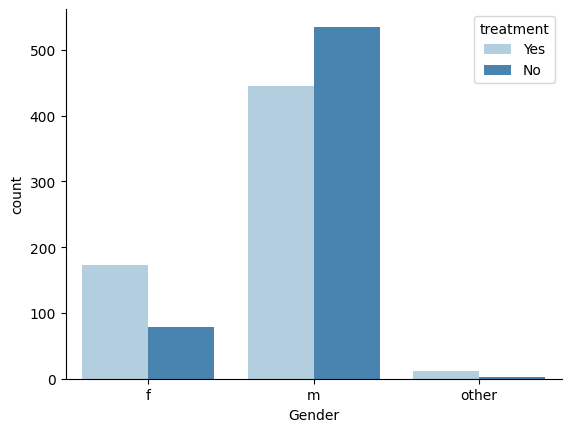

In [69]:
sns.countplot(data=df, x='Gender', hue='treatment', palette='Blues')
sns.despine()

### 3. Como o histórico familiar é relacionado com a presença de doenças mentais e tratamento?

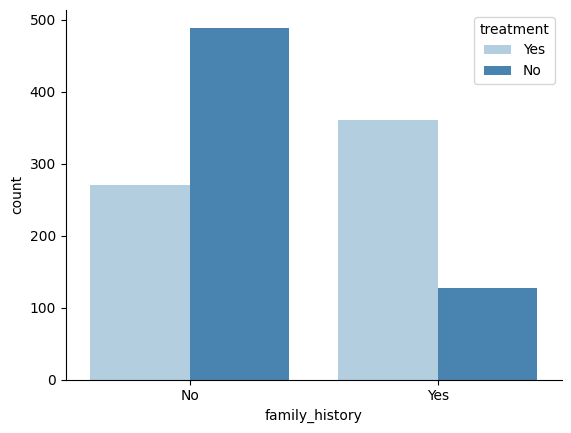

In [77]:
sns.countplot(data=df, x='family_history', hue='treatment', palette='Blues')
sns.despine()

/var/folders/ts/25xsg3cx09zgv15ygxc6krc00000gn/T/ipykernel_86411/152519008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='family_history', palette='Blues')


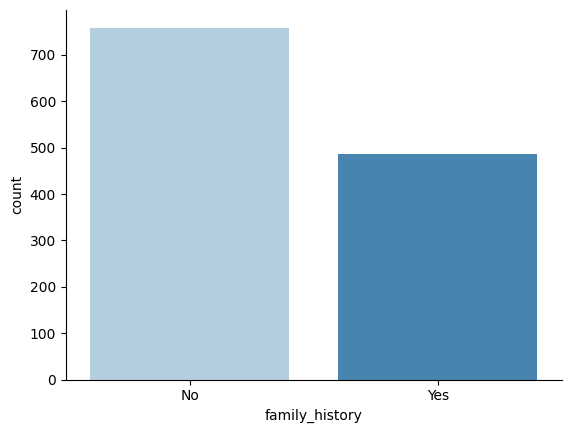

In [71]:
sns.countplot(data=df, x='family_history', palette='Blues')
sns.despine()

# 6. Os funcionários acreditam que discutir a saúde mental ou a saúde física com seus empregadores pode trazer consequências negativas?

/var/folders/ts/25xsg3cx09zgv15ygxc6krc00000gn/T/ipykernel_86411/3529019765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mental_health_consequence', data=df, palette='Greens', ax=axs[0])
/var/folders/ts/25xsg3cx09zgv15ygxc6krc00000gn/T/ipykernel_86411/3529019765.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='phys_health_consequence', data=df, palette='Greens', order=['No', 'Maybe', 'Yes'], ax=axs[1])


<Axes: xlabel='phys_health_consequence', ylabel='count'>

<Figure size 800x500 with 0 Axes>

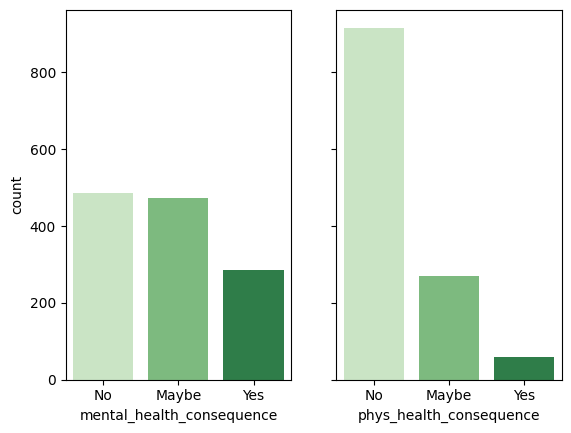

In [85]:
plt.figure(figsize=(8,5))
fig, axs = plt.subplots(1, 2, sharey=True)
sns.countplot(x='mental_health_consequence', data=df, palette='Greens', ax=axs[0])

plt.subplot(1,2,2)

sns.countplot(x='phys_health_consequence', data=df, palette='Greens', order=['No', 'Maybe', 'Yes'], ax=axs[1])

### 4. Qual é o nível de interferência no trabalho que essas doenças causam?

Text(0.5, 1.0, 'Os problemas de saúde mental interferem no trabalho?')

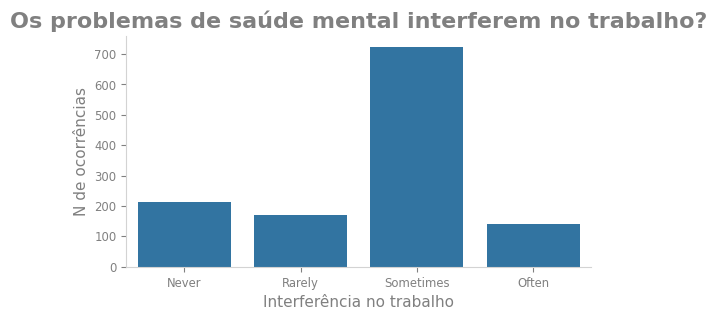

In [97]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='work_interfere', width=0.8, order=['Never', 'Rarely', 'Sometimes', 'Often'])

sns.despine()
plt.gca().spines['left'].set_color('lightgray')
plt.gca().spines['bottom'].set_color('lightgray')

plt.tick_params(axis='both', labelsize='small', labelcolor='gray', color='gray')

plt.xlabel('Interferência no trabalho', fontsize=11, color='gray')
plt.ylabel('N de ocorrências', fontsize=11, color='gray')

plt.title('Os problemas de saúde mental interferem no trabalho?', fontdict={'fontsize':16, 'color': 'gray', 'fontweight':'bold'})